In [26]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [27]:
df = pd.read_csv('House_Rent_Dataset.csv')
print(df.shape)
df.head()

(4746, 12)


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Columns description
**BHK**: Number of Bedrooms, Hall, Kitchen.

**Rent**: Rent of the Houses/Apartments/Flats.

**Size** : Size of the Houses/Apartments/Flats in Square Feet.

**Floor**: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

**Area Type**: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

**Area Locality**: Locality of the Houses/Apartments/Flats.

**City**: City where the Houses/Apartments/Flats are Located.

**Furnishing Status**: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

**Tenant Preferred**: Type of Tenant Preferred by the Owner or Agent.

**Bathroom**: Number of Bathrooms.

**Point of Contact**: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [29]:
#Checking if there's any missing values
print(df.isna().sum(),"\n")
print(df.isnull().sum(),"\n")
for col in df.columns:
    unique_values = df[col].unique()
    print(f"{col}: {len(unique_values)} unique values")
df.drop_duplicates(inplace=True)

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64 

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64 

Posted On: 81 unique values
BHK: 6 unique values
Rent: 243 unique values
Size: 615 unique values
Floor: 480 unique values
Area Type: 3 unique values
Area Locality: 2235 unique values
City: 6 unique values
Furnishing Status: 3 unique values
Tenant Preferred: 3 unique values
Bathroom: 8 unique values
Point of Contact: 3 unique values


In [30]:
#Exploring the floor column
print(df['Floor'].unique()[:30])
df['Floor'].unique().max(),df['Floor'].unique().min()
# Bear in mind that the number of words is different

['Ground out of 2' '1 out of 3' '1 out of 2' 'Ground out of 1'
 'Ground out of 4' '1 out of 4' '1 out of 1' 'Ground out of 3'
 '2 out of 3' '4 out of 5' '2 out of 2' '2 out of 5' '4 out of 14'
 '3 out of 3' '5 out of 5' '4 out of 4' '7 out of 8' '2 out of 4'
 '3 out of 4' '1 out of 5' '8 out of 5' 'Ground out of 6' '2 out of 1'
 'Upper Basement out of 4' 'Ground out of 5' '3 out of 5' '11 out of 19'
 '5 out of 10' '11 out of 14' 'Lower Basement out of 2']


('Upper Basement out of 9', '1')

In [31]:
def find_Floor_Number(name):
    if name=="Ground":
        return 0
    elif name=="Upper Basement":
        return -1
    elif name=="Lower Basement":
        return -2
    else: return int(name)
def find_floor(name):
    '''
        Ground out of...
        (Lower and Upper) Basement out of...
        2 out of ...
        1
        
        Only in case of basement and number we return the 
        first element of list, but in case of these arrays which 
        after split(" ") will have length 1, it is better to use
        try,except structure
    '''
    name = name.split(" ")
    try:
        if(name[1]=="Basement"): 
            return find_Floor_Number(" ".join(name[:2]))
        else: return find_Floor_Number(name[0])
    except:
        return find_Floor_Number(name[0])
df["Floor Number"] = df["Floor"].apply(find_floor)
df = df.drop(columns=['Floor'])
print(df["Floor Number"].describe())
df.info()

count    4746.000000
mean        3.436157
std         5.773950
min        -2.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        76.000000
Name: Floor Number, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
 11  Floor Number       4746 non-null   int64 
dtypes: int64(5), object(7)
memo

Now let's modify date column to set apart months from 'Posted On' column which will come in handy later on in the analysis.

In [32]:
df['Month Number'] = pd.to_datetime(df['Posted On'],format='%Y-%m-%d').dt.month
map_month = {4:"April",5:"May",6:"June",7:"July",8:"August"}
df['Month'] = df['Month Number'].map(map_month)
df['Month'].unique()

array(['May', 'July', 'April', 'June'], dtype=object)

In [33]:
# sns.pairplot(df)


### Rent distribution


count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

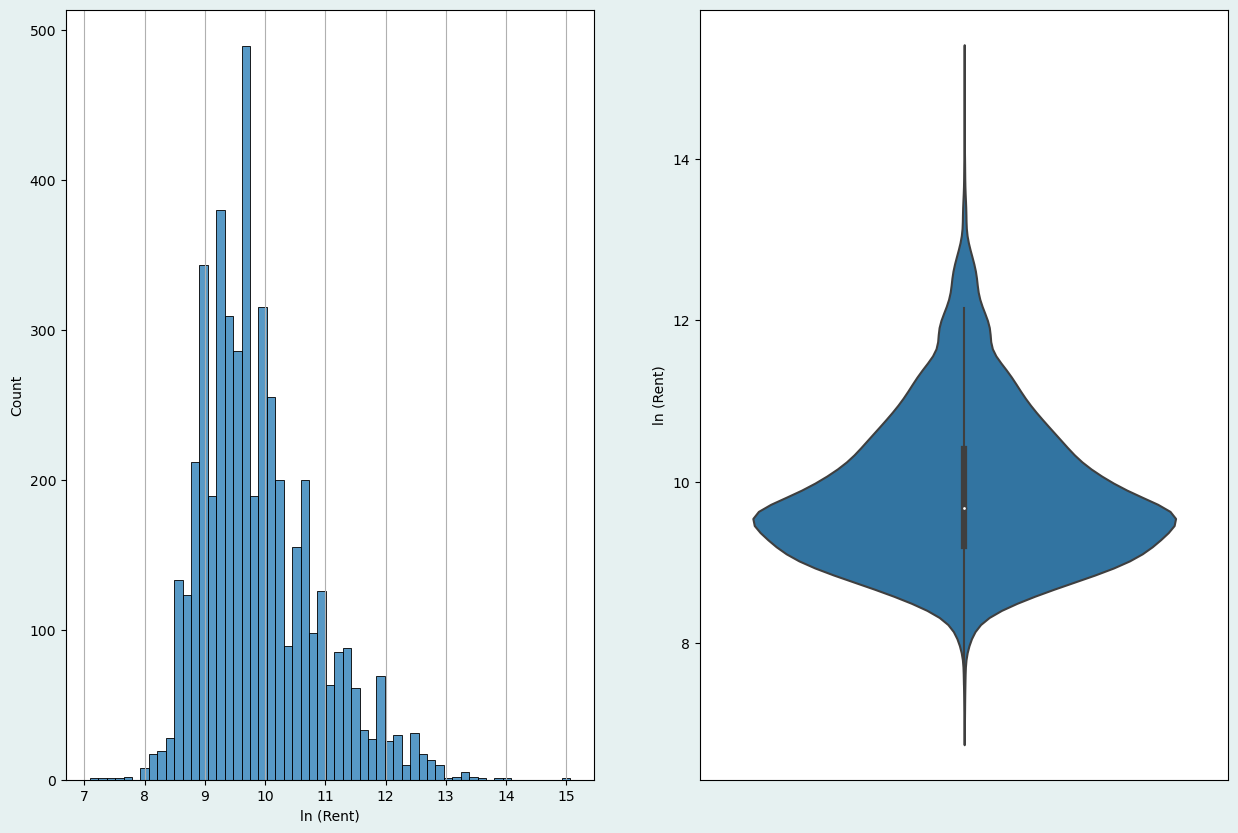

In [34]:
fig,ax = plt.subplots(figsize=(15,10),ncols=2)
ax[0].grid(axis='x')
ax[0].set_xlabel("ln (Rent)")
data = df["Rent"]
sns.histplot(np.log(data),ax=ax[0])
# sns.lineplot(np.log(data))
sns.violinplot(np.log(data),ax=ax[1])
ax[1].set_ylabel("ln (Rent)")
ax[1].set_xticks([])
data.describe()
# plt.gcf().set_facecolor('#e6f1f1')


* I decided to use log function in order to reduce impact of substancial outliers which are in the Rent column.
* As we can see the rent columnn has a bit of positive skew.

### Dates distribution

     Month   Rent
0      May  10000
1      May  20000
2      May  17000
3     July  10000
4      May   7500
...    ...    ...
4741   May  15000
4742   May  29000
4743  July  35000
4744  July  45000
4745   May  15000

[4746 rows x 2 columns]


,Size,Rent,Floor Number
Month Number,,,
4,770.035088,19070.504386,2.135965
5,906.581202,27556.183819,2.773349
6,964.054330,37387.461001,3.293168
7,1124.747444,46938.251534,5.150307


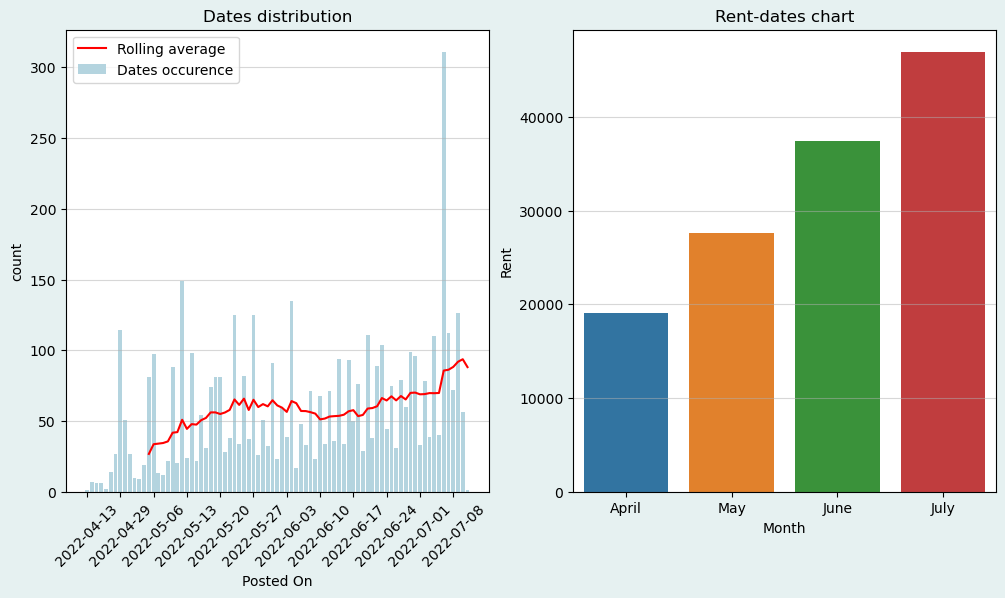

In [35]:
# sns.set_style("whitegrid")

fig,axes = plt.subplots(figsize=(12,6),ncols=2)



data = df['Posted On'].value_counts().sort_index()
ax = sns.barplot(x=data.index,y=data,
                color='lightblue',label="Dates occurence",ax=axes[0])
ax1 = sns.lineplot(x=data.index,y=data.rolling(14).mean(),
                color='red',zorder=999,label="Rolling average",ax=axes[0])
ax1.tick_params(axis='x',rotation=90)
ax1.set_title("Dates distribution")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y',alpha=0.5)
ax1.set_xticks(
            ticks=range(0, len(data),7)
            )


data = df[['Month','Rent']]
month_order = ['April', 'May', 'June', 'July']
print(data)
ax2 = sns.barplot(x=data['Month'],y=data['Rent'],ax=axes[1],order=month_order,errorbar=None)
ax2.grid(axis='y',alpha=0.5)
ax2.set_title("Rent-dates chart")
df[['Size','Month Number','Rent','Floor Number']].groupby(by="Month Number").mean()

* Listings posted remained relatively consistent across our dataset, regardless of the date. However when rolling average of last 14 days is applied we can conclude that there are slightly more postings over time.
* There's high, positive correlation between the time and the rent. The further we go, the costlier listings appear to be, which might be related to a fact that the size of average flat also increases over time

### Floors

3.436156763590392 5.7733412997914355
count    4746.000000
mean        3.436157
std         5.773950
min        -2.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        76.000000
Name: Floor Number, dtype: float64


,Rent,Floor Number
Rent,1.0000,0.3262
Floor Number,0.3262,1.0000


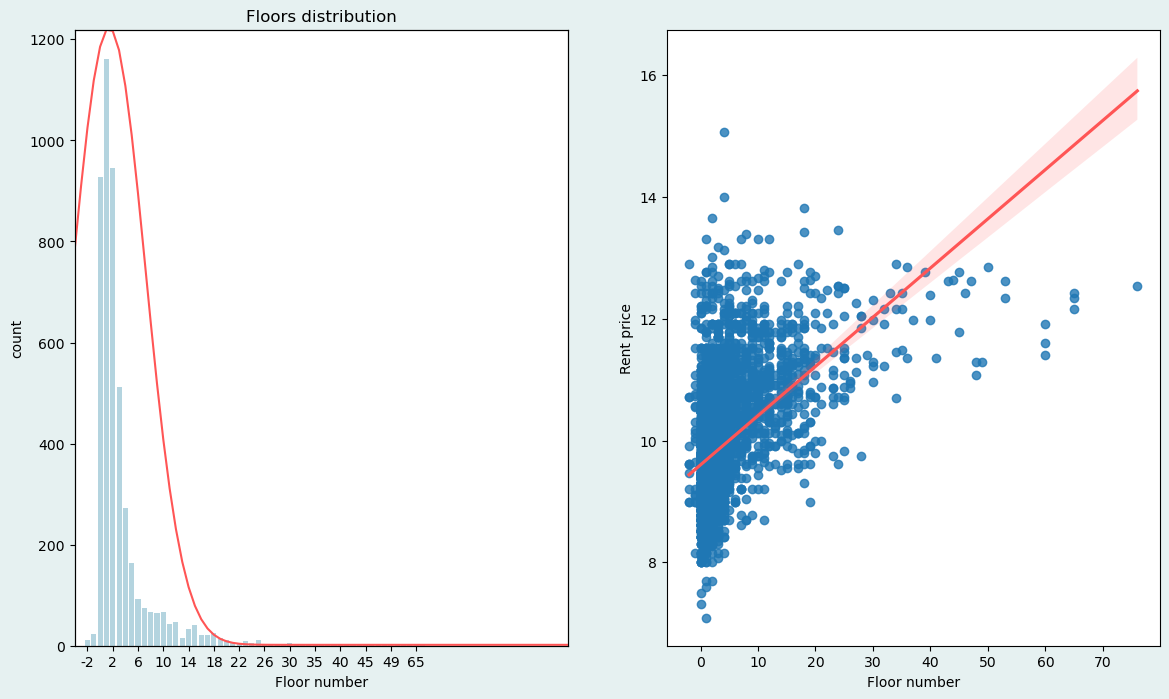

In [36]:
#Floors
from scipy.stats import norm

fig,axes = plt.subplots(figsize=(14,8),ncols=2,nrows=1)
ax1 = axes[0]
data = df['Floor Number'].value_counts().sort_index()
x=data.index
max_floors = data.idxmax()
num_of_floors = data.max()
sns.barplot(x=x,y=data,ax=ax1,color='lightblue')
ax1.set_title("Floors distribution")
ax1.set_xlabel("Floor number")
ax1.set_xticks(
            ticks=range(0, len(data),4)
            )
ax1.set_xlim([min(data.index),max(data.index)])
ax2 = ax1.twinx()
ax2.set_yticks([])
mean = np.mean(df['Floor Number'])
std = np.std(df['Floor Number'])
p = norm.pdf(data.index, mean, std)
ax2.set_ylim([-0.0001,max(p)])
print(mean,std)
sns.lineplot(x=data.index,y=p,ax=ax2,color='#FF5555')

ax2 = axes[1]
data = df
y_data = np.log(data['Rent'])
sns.regplot(x=data['Floor Number'],y=y_data,ax=ax2,line_kws={"color":"#FF5555"}).set_xlabel("Floor number")
ax2.set_ylabel("Rent price")

print(df['Floor Number'].describe())
df[['Rent','Floor Number']].corr()

* Floors -2,-1 refer to basement
* Moderate correlation with Rent column
* Data concentrated mainly in smaller values (25_percentile=1 floor 75_percentile=3 floors) with outliers as high as 76th floor

### Size

8000


,Rent,Size
Rent,1.000000,0.388404
Size,0.388404,1.000000


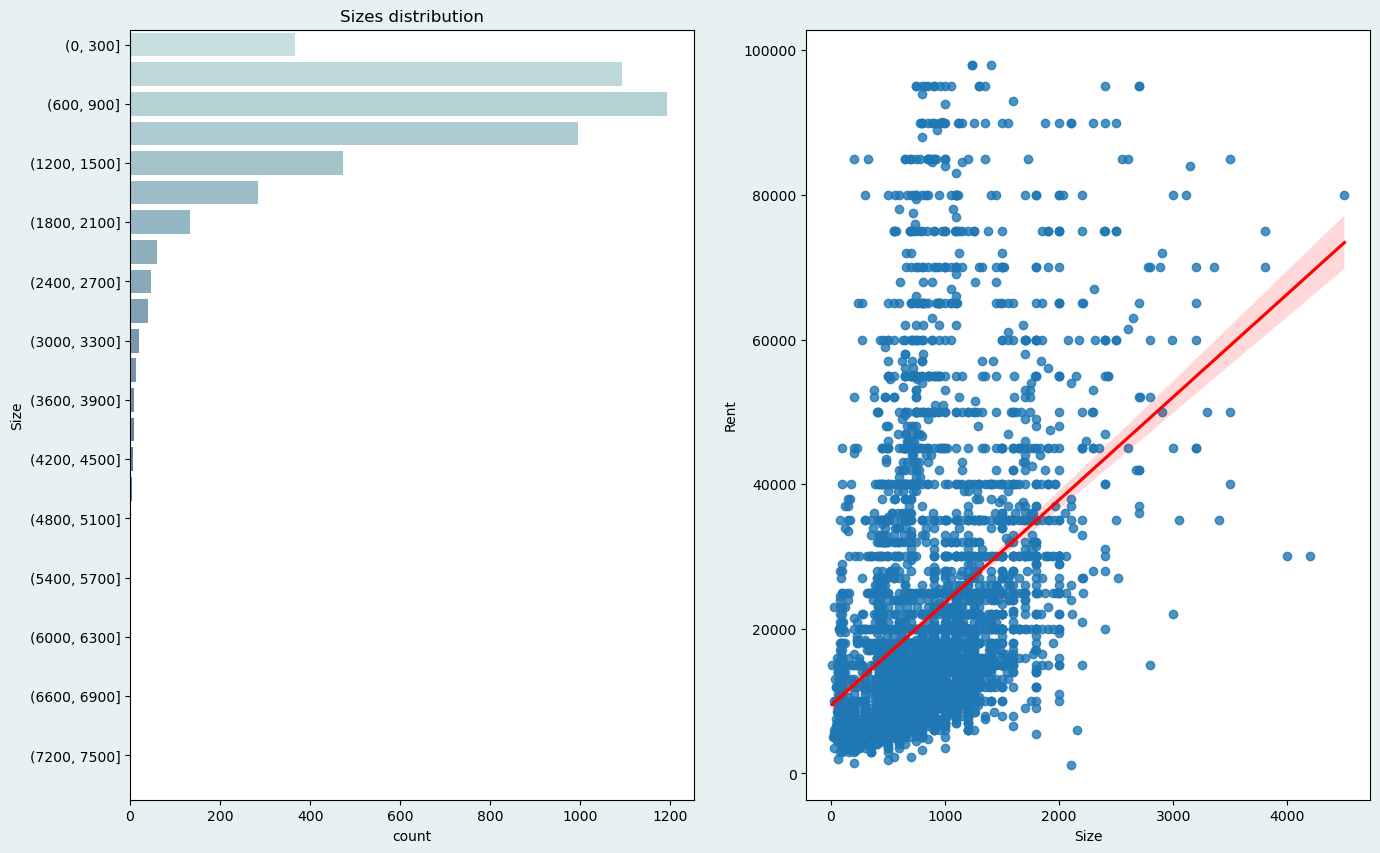

In [37]:
sns.color_palette("deep")
fig,axes = plt.subplots(figsize=(16,10),ncols=2)

ax1 = axes[0]
max_size = df['Size'].max()
print(max_size)
data_binned = pd.cut(df['Size'],bins=np.arange(0,max_size,300)).value_counts().sort_index()
colors = sns.color_palette("ch:start=.2,rot=-.3",len(data_binned))
sns.barplot(x=data_binned, y=data_binned.index,ax=ax1,palette=colors)
ax1.set_yticks(
    ticks=range(0,len(data_binned),2)
)
ax1.set_title("Sizes distribution")

ax2=axes[1]
data = df[df['Rent']<1e5][['Rent','Size']]
sns.regplot(y=data['Rent'],x=data['Size'],line_kws={'color':'red'})
data.corr()

* The highest number of listings falls in the range of 600 to 900.
* Correlation exhibits a slight increase compared to Floor Number column which suggests a stronger dependency between Rent and Size

### Other columns

   BHK  count
0    2   2265
1    1   1167
2    3   1098
3    4    189
4    5     19
5    6      8


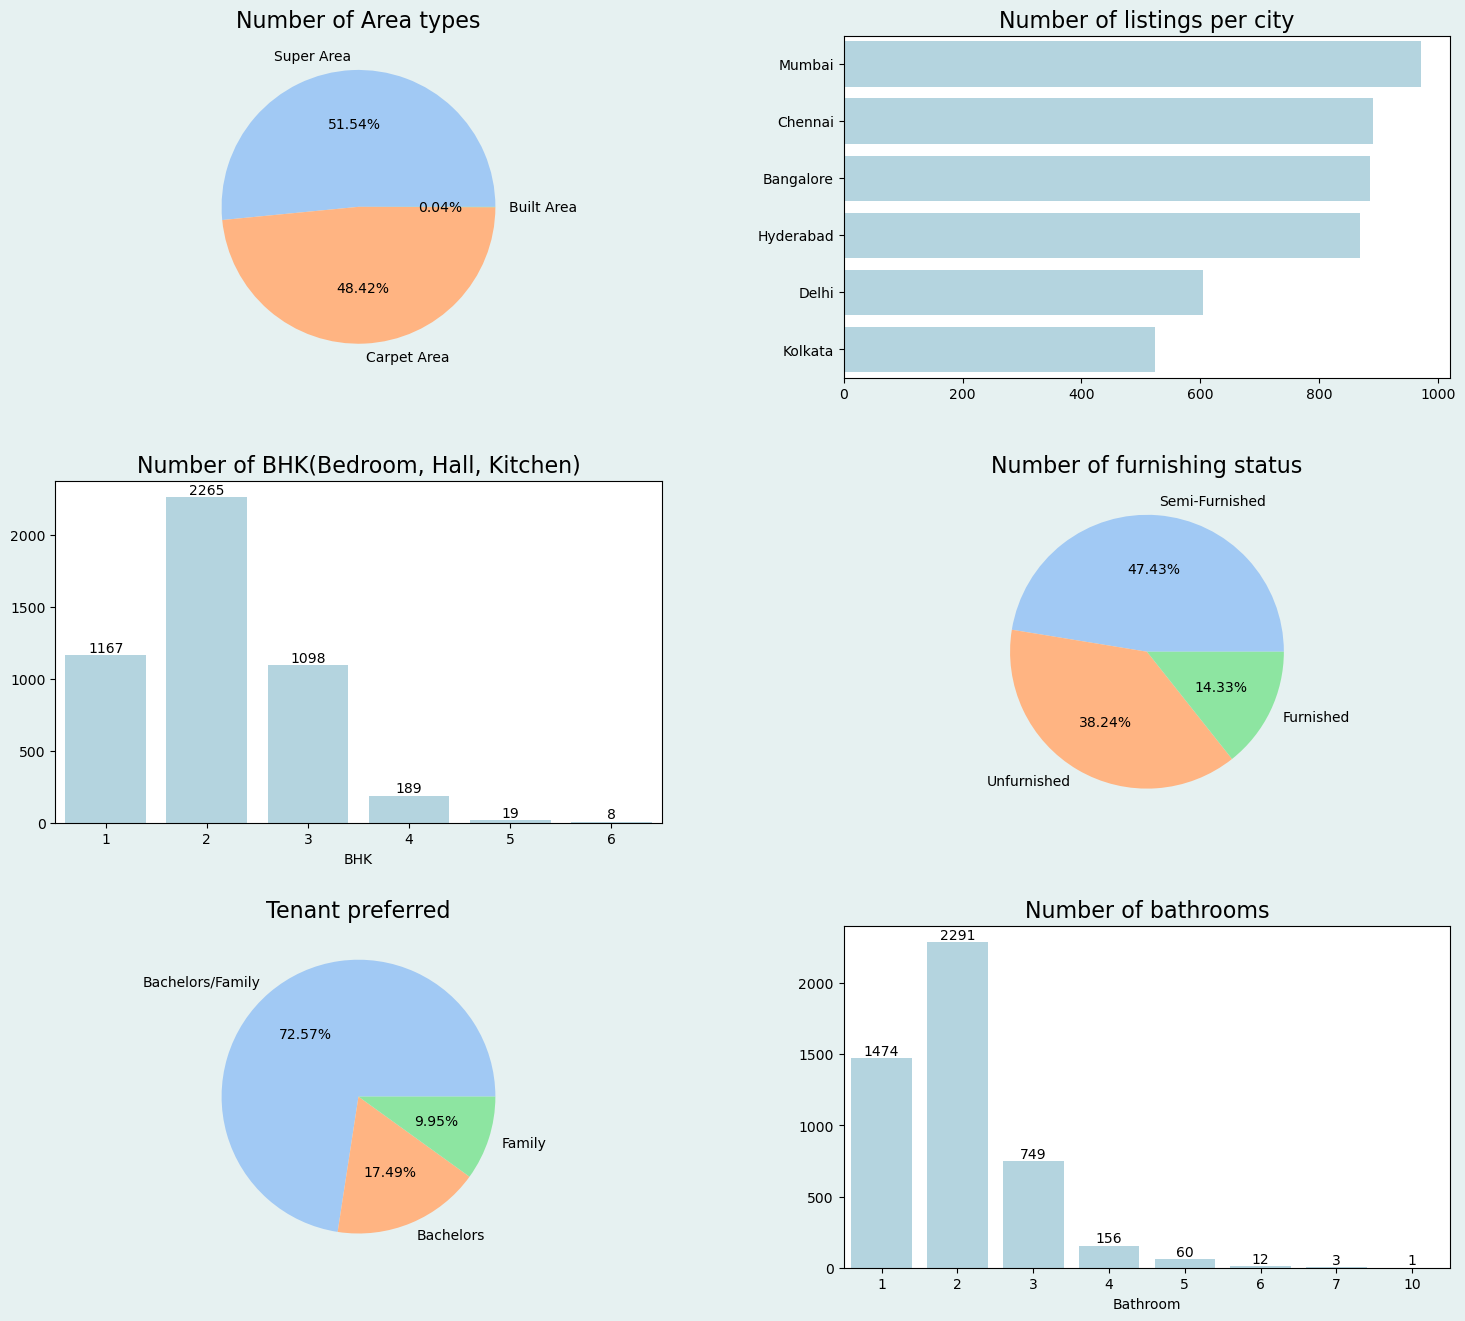

In [38]:

fig,axes = plt.subplots(figsize=(18,16),nrows=3,ncols=2)

ax1 = axes[0, 0]
area_type_counts = df["Area Type"].value_counts()
ax1.pie(area_type_counts, labels=area_type_counts.index, autopct='%1.2f%%', colors=sns.color_palette("pastel"))
ax1.set_title("Number of Area types", fontsize=16)

# Plot for City
ax2 = axes[0, 1]
sns.barplot(x=df["City"].value_counts().values, y=df["City"].value_counts().index, ax=ax2, color='lightblue')
ax2.set_title("Number of listings per city", fontsize=16)

# Plot for BHK
ax3 = axes[1, 0]
data = df["BHK"].value_counts()
sns.barplot(x=data.index, y=data, ax=ax3, color='lightblue')
ax3.set_title("Number of BHK(Bedroom, Hall, Kitchen)", fontsize=16)
data = data.reset_index()
print(data)
for index,row in data.iterrows():
    # print(index,row)
    ax3.text(row['BHK']-1, row['count'] + 20, str(row['count']), ha='center', fontsize=10)

# Plot for Furnishing Status
ax4 = axes[1, 1]
ax4.pie(df["Furnishing Status"].value_counts().values, labels=df["Furnishing Status"].value_counts().index, autopct='%1.2f%%', colors=sns.color_palette("pastel"))
ax4.set_title("Number of furnishing status", fontsize=16)

ax5 = axes[2,0]
data = df['Tenant Preferred'].value_counts()
ax5.pie(data.values,labels=data.index,autopct='%1.2f%%', colors=sns.color_palette("pastel"))
ax5.set_title("Tenant preferred", fontsize=16)

ax6 = axes[2,1]
data = df['Bathroom'].value_counts()
sns.barplot(x=data.index,y=data,color='lightblue',ax=ax6)
ax6.set_title("Number of bathrooms", fontsize=16)
data = data.sort_index().reset_index()
# print(data)
for index,row in data.iterrows():
    # print(index,row)
    ax6.text(index,row['count']+20,row['count'],ha='center', fontsize=10)


for ax_row in axes:
    for ax in ax_row:
        ax.set_ylabel("")
# plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)


* As we can see most of the listings are distributed more or less equally throughout the cities with **most** being in **Mumbai** (number) and the **least** in **Kolkata**
* Majority of area types belongs to super area and carpet area with tiny percentage for built area type.
* Majority of rental properties has 2 BHK 
* Also we should know that only a small fraction of them is said to be fully furnished while the other are either unfurnished or semi-furnished

2


<Axes: xlabel='Size', ylabel='Area Type'>

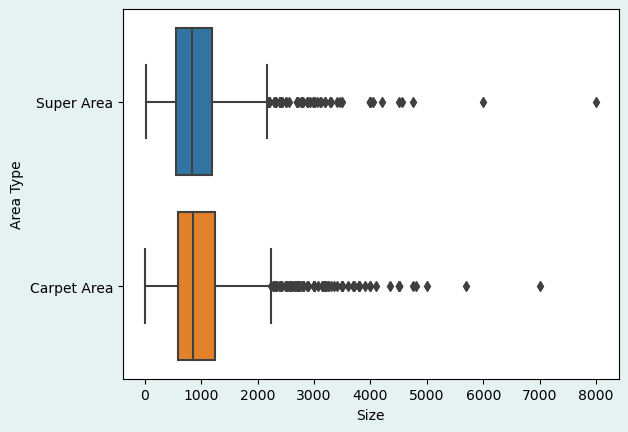

In [39]:
print(df[df['Area Type']=='Built Area'].count()[0])
# There's only two records of built area, therefore i'll neglect this particular area type
df = df[df['Area Type']!='Built Area']
data = df[['Size','Area Type']]
sns.boxplot(x=data['Size'],y=data['Area Type'])

In [40]:
df[df['Rent']>7e5].count()
# For easier visualization I'll skip 4 outliers

Posted On            4
BHK                  4
Rent                 4
Size                 4
Area Type            4
Area Locality        4
City                 4
Furnishing Status    4
Tenant Preferred     4
Bathroom             4
Point of Contact     4
Floor Number         4
Month Number         4
Month                4
dtype: int64

City
Mumbai       963
Chennai      889
Bangalore    885
Hyderabad    867
Delhi        605
Kolkata      524
Name: count, dtype: int64

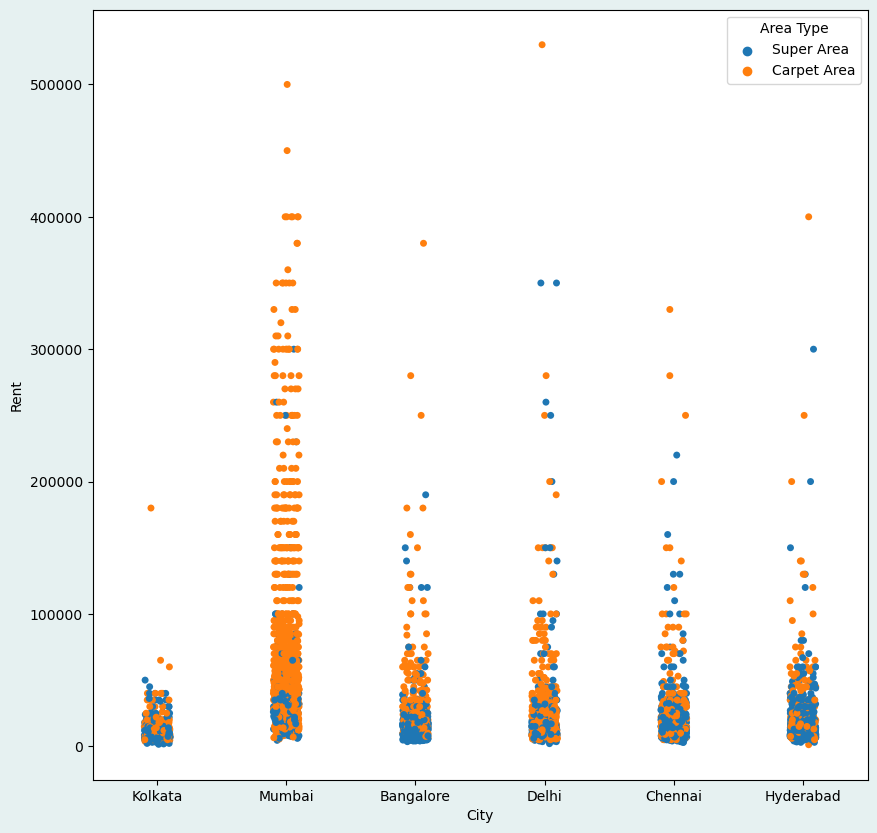

In [60]:
plt.figure(figsize=(10,10))
data = df[df['Rent']<6e5]
sns.stripplot(x='City',y='Rent',data=data,hue='Area Type')
data['City'].value_counts()

                   BHK  Bathroom      Rent  Floor Number      Size
BHK           1.000000  0.794829  0.369685      0.223534  0.716114
Bathroom      0.794829  1.000000  0.441197      0.330301  0.740669
Rent          0.369685  0.441197  1.000000      0.326214  0.413528
Floor Number  0.223534  0.330301  0.326214      1.000000  0.169290
Size          0.716114  0.740669  0.413528      0.169290  1.000000


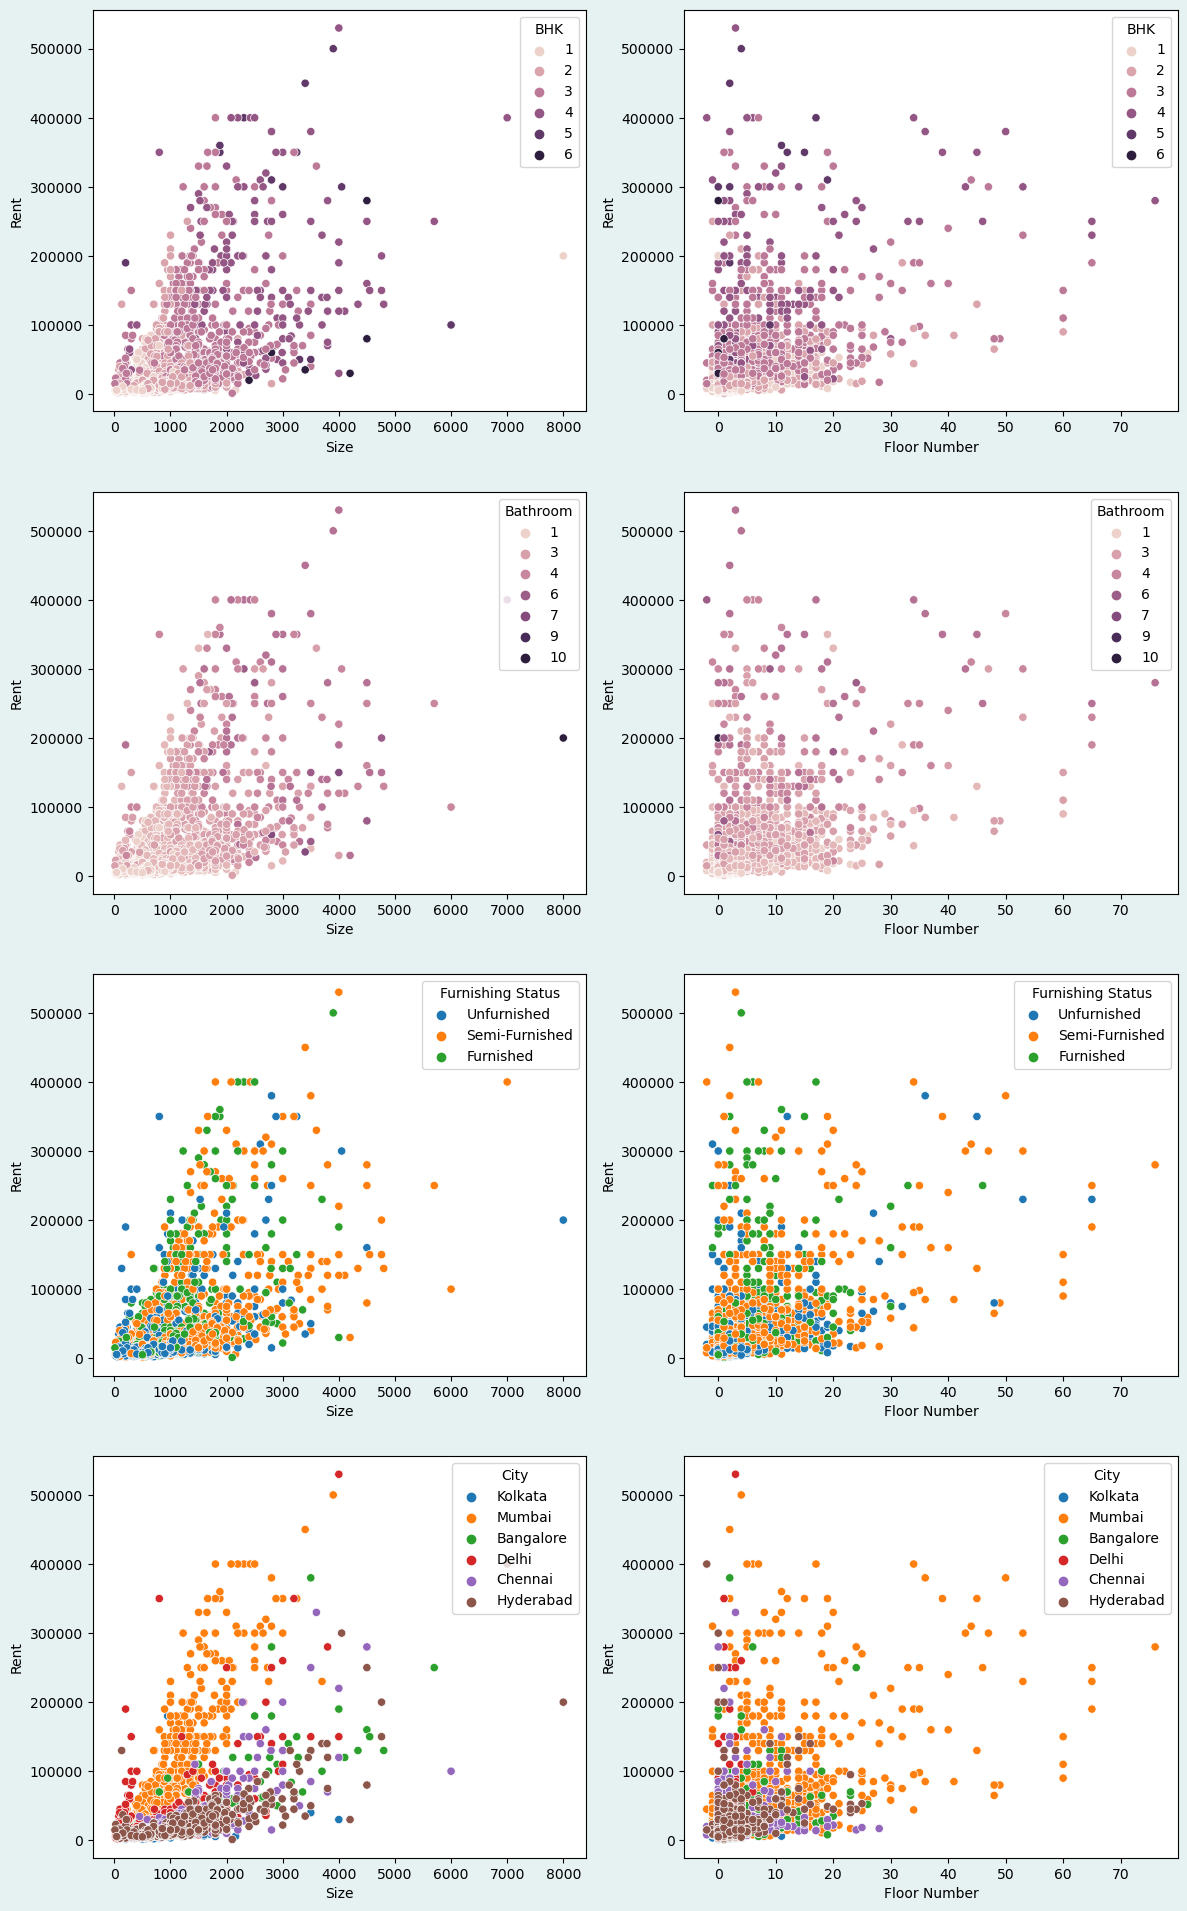

In [41]:
print(df[['BHK','Bathroom','Rent','Floor Number','Size']].corr())
# Chart of rent with hue for bhk, bathroom,rent
# Furnishing status, area type
# Cities
data = df[df['Rent']<6e5]
fig,axes = plt.subplots(figsize=(14,24),nrows=4,ncols=2)
for i,column in enumerate(['BHK','Bathroom','Furnishing Status','City']):
    # axes_num = list(map(int,bin(i*2)[2:].zfill(3)))
    ax1 = axes[i,0]
    sns.scatterplot(y=data['Rent'],x=data['Size'],hue=data[column],ax=ax1)
    ax2 = axes[i,1]
    sns.scatterplot(y=data['Rent'],x=data['Floor Number'],hue=data[column],ax=ax2)


* Brighter colors are common in flats with smaller sizes which means that the bigger the flat, the more BHK and bathrooms are inside which is totally logical. Although it's not not case in Floor number column 
* Furnishing status appears to be equally distributed among all the sizes
* Among the cities, a clear distinction delineates between more affordable location like Hyderabad and pricier one in Mumbai for instance

#### Now let's dig a little bit deeper to unfold the correlation between size and rent in each city

Text(0, 0.5, 'Rent')

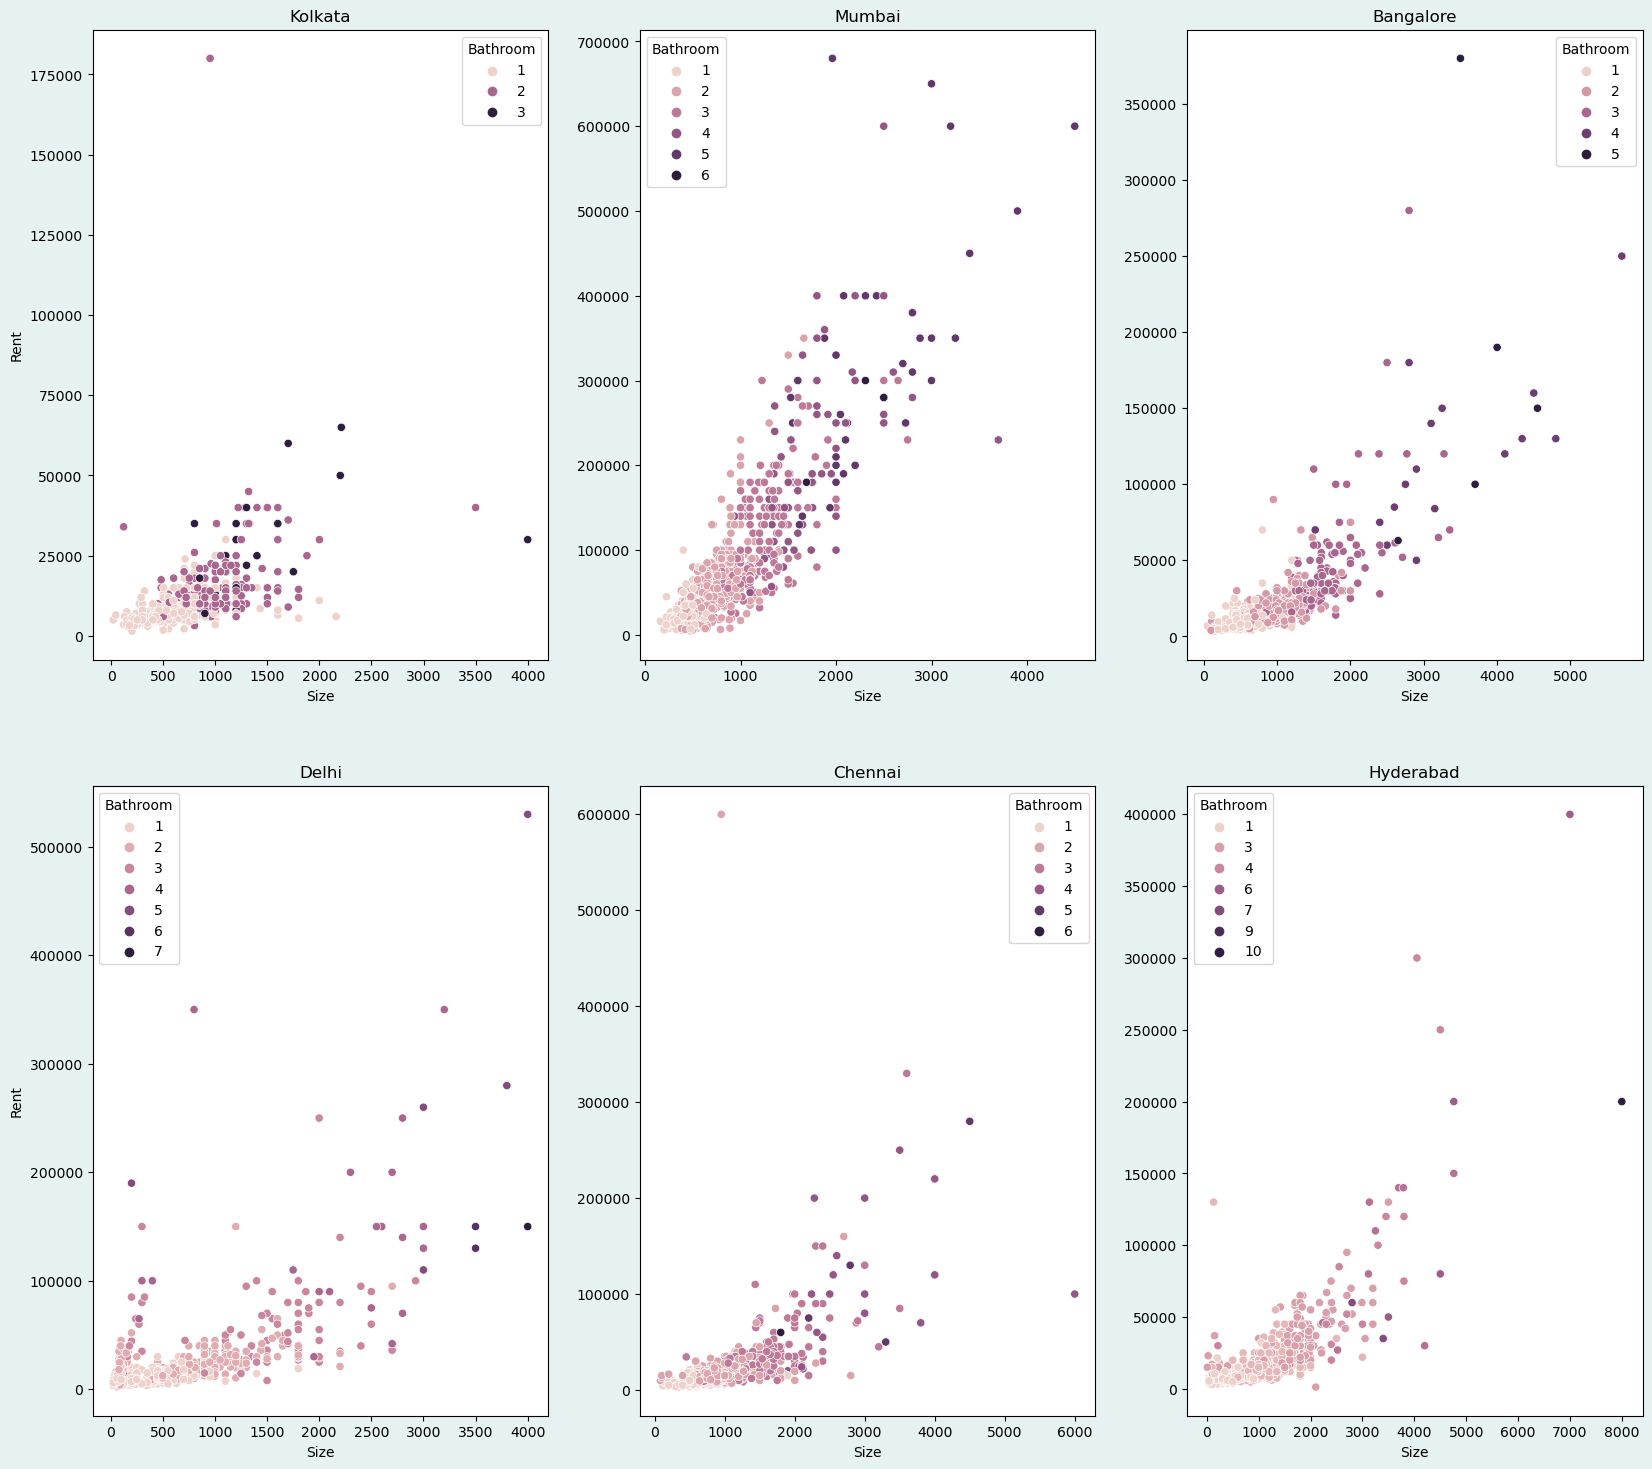

In [42]:
fig,axes = plt.subplots(figsize=(20,18),nrows=2,ncols=3)
data = df[df['Rent']<7e5][['Rent','Size','City','Bathroom']]
for i,city in enumerate(df['City'].unique()):
    
    col = i%3
    row = int(i/3)
    ax=axes[row,col]
    data_plot = data[(data['City']==city)]
    sns.scatterplot(x=data_plot['Size'],y=data_plot['Rent'],ax=ax,hue=data_plot['Bathroom'])
    ax.set_title(city)
    ax.set_ylabel("")
axes[0,0].set_ylabel("Rent")
axes[1,0].set_ylabel("Rent")

* Profound impact of size on the rent price, although not in every city, which may indicate that correlation size-rent differs depending on the city
* Number of bathrooms also tend to rise with size

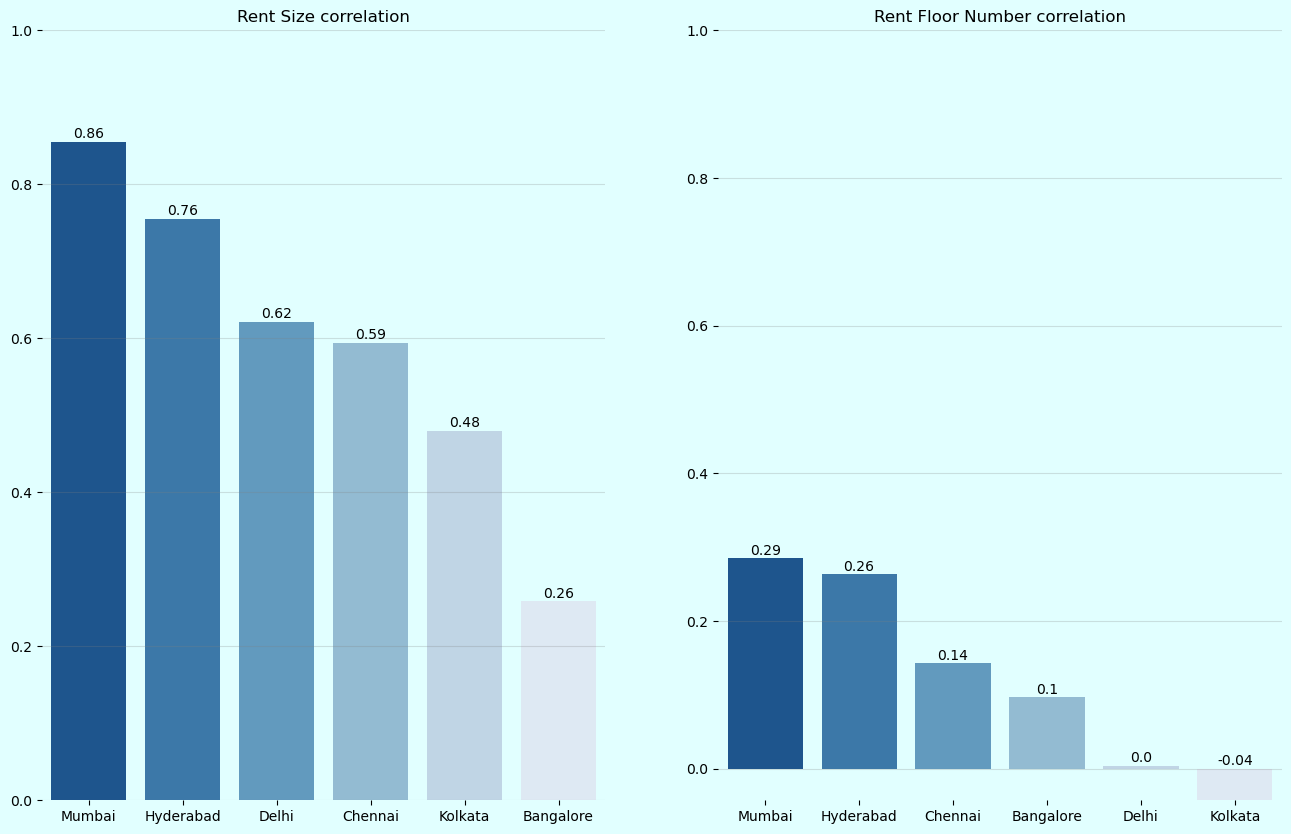

In [43]:
fig,axes = plt.subplots(figsize=(16,10),ncols=2)
fig.patch.set_facecolor('#e1ffff') 
for ax in axes:
    ax.set_facecolor('#e1ffff')  # Change background color here
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.spines['right'].set_visible(False)  # Hide right spine
    ax.spines['bottom'].set_visible(False)  # Hide bottom spine
    ax.spines['left'].set_visible(False)  # Hide left spine

for i,column in enumerate(['Size','Floor Number']):
    ax = axes[i]
    #Correlation for each city and size
    correlation_by_city = df.pivot_table(index='City', values=['Rent', column],aggfunc='corr')
    # correlation_by_city = [(city, correlation_by_city.loc[city].loc['Size']['Rent']) for city in df['City'].unique()]
    correlation_by_city =  correlation_by_city[['Rent']][correlation_by_city['Rent']!=1].sort_values(by="Rent",ascending=False)
    data = correlation_by_city['Rent']
    datax = data.index
    datax = [el[0] for el in datax]
    sns.barplot(y=data.values,x=datax,palette='Blues_r',ax=ax)
    ax.set_title("Rent "+column+" correlation")
    for i,value in enumerate(data.values):
        ax.text(i,max(0.005,value+0.005),s=round(value,2),ha='center')
    ax.set_ylim(min(0,data.values.min()),1)
    ax.grid(axis='y', linestyle='-', alpha=0.25,color='grey')
    
    




* Mumbai exhibits really high dependency between size of the flat and the Rent price
* In bangalore we have the lowest correlation of 0.26 which significatnly lowers the average correlation
* This insight might be helpful when it comes to running a machine learning model since city plays a vital role in rent prediction

In [44]:
cols_enc = []
for col in df.columns:
    if  df[col].dtype =='object':
        cols_enc.append(col)
print(cols_enc)
cols_enc.remove("Posted On")
cols_enc.remove("Month")
cols_enc

['Posted On', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact', 'Month']


['Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

In [45]:
labelencoder = LabelEncoder()
for col in cols_enc:
        df[col+' Num'] = labelencoder.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4744 entries, 0 to 4745
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Posted On              4744 non-null   object
 1   BHK                    4744 non-null   int64 
 2   Rent                   4744 non-null   int64 
 3   Size                   4744 non-null   int64 
 4   Area Type              4744 non-null   object
 5   Area Locality          4744 non-null   object
 6   City                   4744 non-null   object
 7   Furnishing Status      4744 non-null   object
 8   Tenant Preferred       4744 non-null   object
 9   Bathroom               4744 non-null   int64 
 10  Point of Contact       4744 non-null   object
 11  Floor Number           4744 non-null   int64 
 12  Month Number           4744 non-null   int32 
 13  Month                  4744 non-null   object
 14  Area Type Num          4744 non-null   int32 
 15  Area Locality Num      474

In [46]:
df.drop(columns=['Month','Posted On'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4744 entries, 0 to 4745
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   BHK                    4744 non-null   int64 
 1   Rent                   4744 non-null   int64 
 2   Size                   4744 non-null   int64 
 3   Area Type              4744 non-null   object
 4   Area Locality          4744 non-null   object
 5   City                   4744 non-null   object
 6   Furnishing Status      4744 non-null   object
 7   Tenant Preferred       4744 non-null   object
 8   Bathroom               4744 non-null   int64 
 9   Point of Contact       4744 non-null   object
 10  Floor Number           4744 non-null   int64 
 11  Month Number           4744 non-null   int32 
 12  Area Type Num          4744 non-null   int32 
 13  Area Locality Num      4744 non-null   int32 
 14  City Num               4744 non-null   int32 
 15  Furnishing Status Num  474

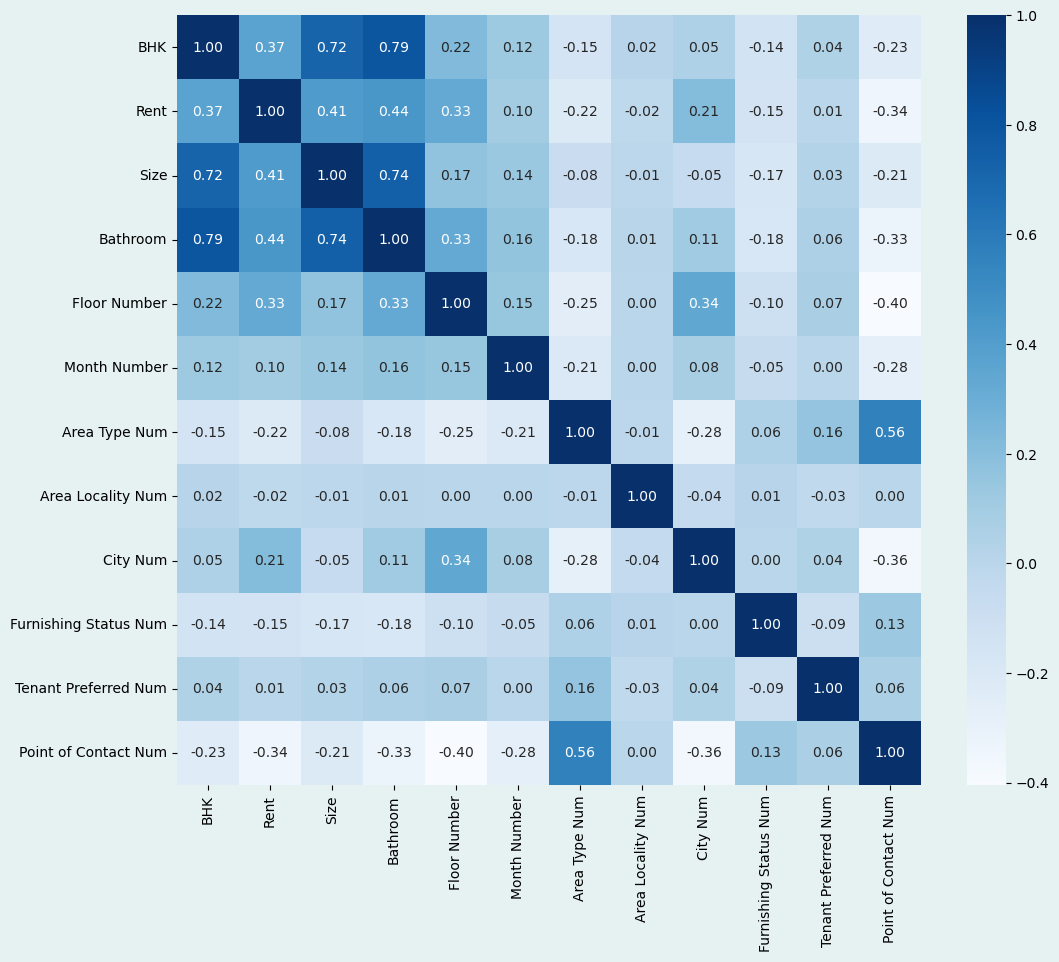

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='Blues', fmt=".2f")
plt.rcParams['figure.facecolor'] = '#e6f1f1'

### Correlation plot for each city

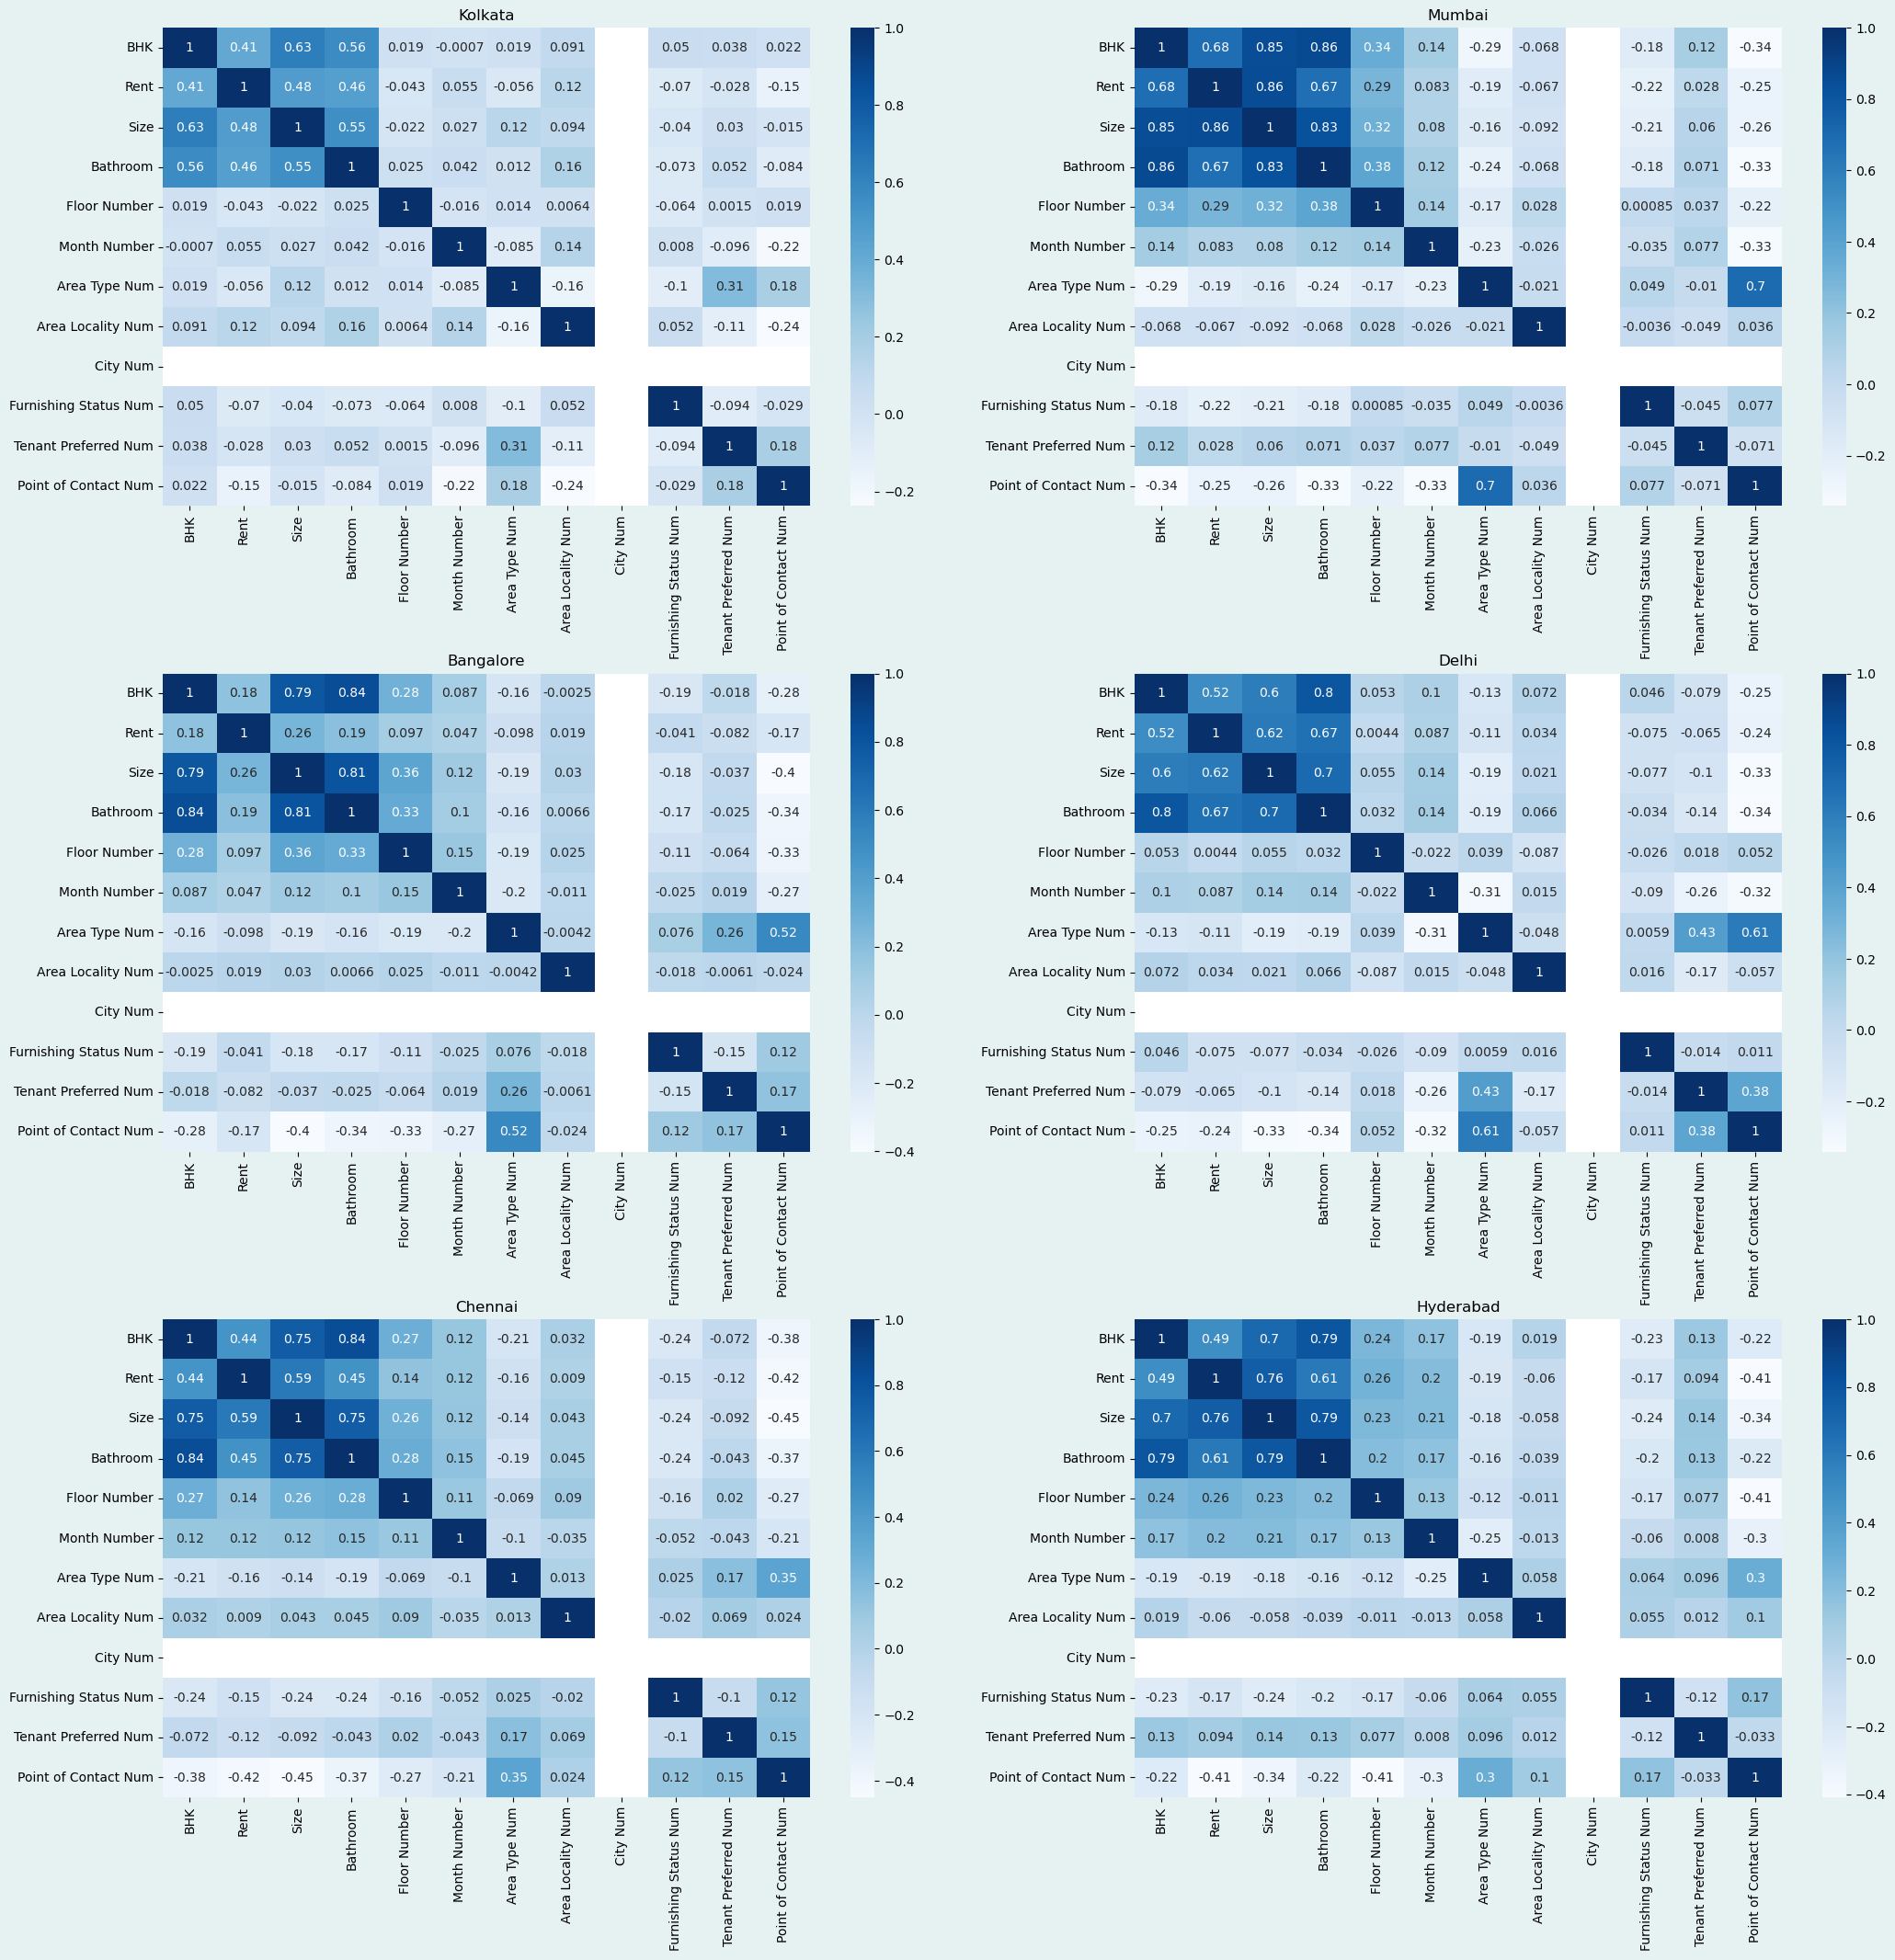

In [49]:
fig,axes = plt.subplots(figsize=(25,25),nrows=3,ncols=2)
data = df
for i,city in enumerate(df['City'].unique()):
    
    col = i%2
    row = int(i/2)
    ax=axes[row,col]
    data_corr = data[(data['City']==city)].select_dtypes(exclude='object').corr()
    corrplt = sns.heatmap(data_corr, annot=True, cmap='Blues',ax=axes[row,col])
    # corrplt.set_xticklabels(corrplt.get_xticklabels(), fontsize=17)
    # corrplt.set_xticklabels(corrplt.get_yticklabels(), fontsize=17)
    ax.set_title(city)
plt.subplots_adjust(hspace=0.35)
# axes[0,0].set_ylabel("Rent")
# axes[1,0].set_ylabel("Rent")

* Out of every city Bangalore's rent price appears to be the least correlated with any other feauture
* The most noticable correlations can be found in the left-top corner which includes BHK, Rent, Size, Bathroom and partially Floor number
* There's also a moderate correlation between Point of Contact and Rent 
* In some places (Delhi, Mumbai) Point of conatact is highly explained by Area type feature